<a href="https://colab.research.google.com/github/AashiDutt/LLM-Projects/blob/main/AI_Architect_fine_tuning_stable_diffusion_with_Dreambooth_and_LoRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This whole project is hosted on HuggingFace Spaces and HuggingFace Models.
https://huggingface.co/Aashi/AI-Architect-fine-tuning-stable-diffusion-with-Dreambooth-and-LoRA

## The idea

Intake a pic of a room you want to redesign, then the ai will output a redesigned room image for the same.

## What this code covers
- This code covers fine tuning SDXL using dreambooth and autotune then saving the LoRA weights and pushing them to a repo on HuggingFace.
- then we create a diffusion pipeline to generate the image, using a custom VAE decoder and SDXL base model with FP16 precision.
- we will load the LoRA weights and add them to the base model using Hugging Face repo ID. Then run the pipeline with the prompt and generate three images.

## Image to video
Once we have the image generated by using fine tuned model then we pass this image to Stable Video Diffusion model by Stability AI that helps to convert image into video.

You can try it out here: https://www.kaggle.com/code/aashidutt3/video-generation-with-stable-video-diffusion

## Tools used

*   DreamBooth - Gen ai by Google research team, Text to image models - requires 3-5 images of subject to train model efffectively.
*  Stable Diffusion XL - Stability ai released this model for text to image generation.
*  Autotrain Advanced - This Automatic Machine learning library is designed for training and deploying state-of-the-art machine-learning models with minimal code.


### Resource for this repo
- https://www.datacamp.com/tutorial/fine-tuning-stable-diffusion-xl-with-dreambooth-and-lora

- https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/SDXL_DreamBooth_LoRA_.ipynb

In [1]:
!pip install -U autotrain-advanced

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.1/213.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 520.4/520.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 45.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 33.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━

In [1]:
from diffusers import DiffusionPipeline, AutoencoderKL
import torch

In [3]:
 ! mkdir photos_dream

In [4]:
PROJECT_NAME = "DreamBooth_SDXL"
MODEL_NAME = "stabilityai/stable-diffusion-xl-base-1.0"
DATA_DIR = "/content/photos_dream"
REPO_ID = "Aashi/AI-Architect-fine-tuning-stable-diffusion-with-Dreambooth-and-LoRA"

In [5]:
from google.colab import userdata
hf_token = userdata.get('HF-TOKEN')


In [6]:
from PIL import Image

def image_grid(imgs, rows, cols, resize=256):
    assert len(imgs) == rows * cols

    if resize is not None:
        imgs = [img.resize((resize, resize)) for img in imgs]

    w, h = imgs[0].size
    grid_w, grid_h = cols * w, rows * h
    grid = Image.new("RGB", size=(grid_w, grid_h))

    for i, img in enumerate(imgs):
        x = i % cols * w
        y = i // cols * h
        grid.paste(img, box=(x, y))

    return grid

import glob

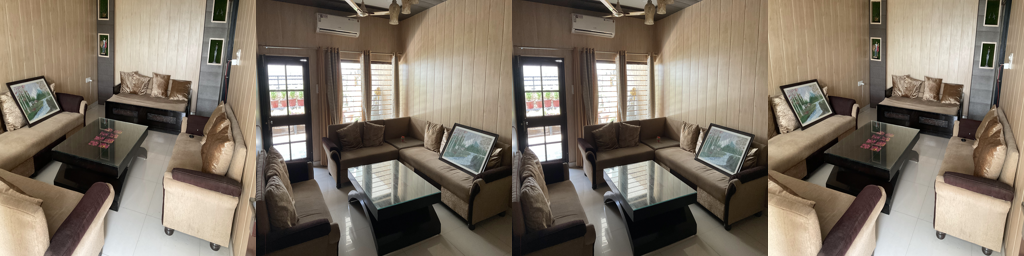

In [7]:
imgs = [Image.open(path) for path in glob.glob("/content/photos_dream/*.jpg")]
image_grid(imgs, 1,4)

In [8]:
!autotrain dreambooth \
--model $MODEL_NAME \
--project-name $PROJECT_NAME \
--image-path $DATA_DIR \
--prompt "A photo of living room in minimalistic architecture with small plants on center table and a nice lamp at the corner" \
--resolution 1024 \
--batch-size 1 \
--num-steps 500 \
--gradient-accumulation 4 \
--lr 1e-4 \
--fp16 \
--push-to-hub \
--token $hf_token \
--repo-id $REPO_ID


> INFO    Namespace(version=False, revision=None, tokenizer=None, image_path='/content/photos_dream', class_image_path=None, prompt='A photo of living room in minimalistic architecture with small plants on center table and a nice lamp at the corner', class_prompt=None, num_class_images=100, class_labels_conditioning=None, prior_preservation=None, prior_loss_weight=1.0, resolution=1024, center_crop=None, train_text_encoder=None, sample_batch_size=4, num_steps=500, checkpointing_steps=100000, resume_from_checkpoint=None, scale_lr=None, scheduler='constant', warmup_steps=0, num_cycles=1, lr_power=1.0, dataloader_num_workers=0, use_8bit_adam=None, adam_beta1=0.9, adam_beta2=0.999, adam_weight_decay=0.01, adam_epsilon=1e-08, max_grad_norm=1.0, allow_tf32=None, prior_generation_precision=None, local_rank=-1, xformers=None, pre_compute_text_embeddings=None, tokenizer_max_length=None, text_encoder_use_attention_mask=None, rank=4, xl=None, fp16=True, bf16=None, validation_prompt=None, num_valid

In [12]:
# --------------------------------------- ORIGINAL ---------------------------------------

from diffusers import DiffusionPipeline, AutoencoderKL, StableDiffusionXLImg2ImgPipeline

import torch

vae = AutoencoderKL.from_pretrained(
    "madebyollin/sdxl-vae-fp16-fix",
    torch_dtype=torch.float16
)
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    vae=vae,
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True,
)
pipe.to("cuda");
pipe.load_lora_weights(REPO_ID, weight_name="pytorch_lora_weights.safetensors")# loading finetuned lora weights from finetuned model


prompt = "A photo of minimilistic looking living room with bright colors on walls and small plants"

image = pipe(prompt=prompt, num_inference_steps=25, num_images_per_prompt = 3)
image_grid(image.images, 1, 3)

In [ ]:
prompt = "A photo of a beachy living room with open windows"

image = pipe(prompt=prompt, num_inference_steps=25, num_images_per_prompt = 3)
image_grid(image.images, 1, 3)

In [ ]:
prompt = "A photo of a indian living room with art pieces."

seed = 65
generator = torch.Generator("cuda").manual_seed(seed)
image = pipe(prompt=prompt, num_inference_steps=25, generator=generator).images[0]
image.resize((300, 300))

In [ ]:
refiner = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0",
    vae=vae,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
)
refiner.to("cuda");

image = refiner(prompt=prompt, num_inference_steps=25, generator=generator, image=image)
image.images[0].resize((300, 300))

## Image to Image generation with prompt conditioning using stable diffusion

In [13]:
# Image to image

from diffusers import DiffusionPipeline, AutoencoderKL, StableDiffusionXLImg2ImgPipeline
from PIL import Image
import torch
import matplotlib.pyplot as plt

# Load the model components
vae = AutoencoderKL.from_pretrained(
    "madebyollin/sdxl-vae-fp16-fix",
    torch_dtype=torch.float16
)
pipe = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    vae=vae,
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True,
).to("cuda")

# Load LoRA weights if you have any
pipe.load_lora_weights(REPO_ID, weight_name="pytorch_lora_weights.safetensors")

# Prepare the input image
input_image_path = 'path/to/your/input/image.jpg'
input_image = Image.open(input_image_path).convert("RGB")

# Preprocess the image
preprocessed_image = pipe.feature_extractor(input_image, return_tensors="pt").to("cuda")

# Generate the image based on the input image
output_images = pipe(prompt="western living room with comfy couch", init_image=preprocessed_image, num_inference_steps=25, num_images_per_prompt=3)

# Convert tensor outputs to PIL images and display
def show_images(images, num_rows, num_cols):
    _, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))
    axs = axs.flatten()
    for img, ax in zip(images, axs):
        ax.imshow(img)
        ax.axis('off')
    plt.show()

show_images([img.cpu().numpy() for img in output_images.images], 1, 3)


In [6]:
from diffusers import DiffusionPipeline, AutoencoderKL, StableDiffusionXLImg2ImgPipeline
from PIL import Image
import torch
import matplotlib.pyplot as plt

# Load the model components
vae = AutoencoderKL.from_pretrained(
    "madebyollin/sdxl-vae-fp16-fix",
    torch_dtype=torch.float16
)
pipe = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    vae=vae,
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True,
).to("cuda")

# Load LoRA weights if you have any
pipe.load_lora_weights(REPO_ID, weight_name="pytorch_lora_weights.safetensors")

# Prepare the input image
input_image_path = '/content/images.jpeg'
input_image = Image.open(input_image_path).convert("RGB")

# Preprocess the image
preprocessed_image = pipe.feature_extractor(input_image, return_tensors="pt").to("cuda")

# Generate the image based on the input image
output_images = pipe(prompt="western living room with comfy couch", init_image=preprocessed_image, num_inference_steps=25, num_images_per_prompt=3)

# Function to show and save images
def show_and_save_images(images, num_rows, num_cols, save_path='generated_images/'):
    _, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))
    axs = axs.flatten()
    for i, (img, ax) in enumerate(zip(images, axs)):
        ax.imshow(img)
        ax.axis('off')
        # Convert the tensor to PIL Image and save it
        pil_img = Image.fromarray((img * 255).astype('uint8'))
        pil_img.save(f"{save_path}image_{i}.jpg")
    plt.show()

# Display and save the images
show_and_save_images([img.cpu().numpy() for img in output_images.images], 1, 3)


## Image to video generation with Stable Video Diffusion

In [20]:
# !pip install diffusers

In [22]:
# !pip install stable-diffusion-videos

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 23.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 26.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.4 

In [2]:
# !pip install -q -U diffusers transformers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 51.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autotrain-advanced 0.6.80 requires diffusers==0.21.4, but you have diffusers 0.25.0 which is incompatible.
autotrain-advanced 0.6.80 requires transformers==4.36.1, but you have transformers 4.36.2 which is incompatible.
stable-diffusion-videos 0.8.1 requires diffusers==0.11.1, but you have diffusers 0.25.0 which is incompatible.


In [6]:
!pip install git+https://github.com/huggingface/diffusers.git


  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-wt5bic7d
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-wt5bic7d
  Resolved https://github.com/huggingface/diffusers.git to commit f2d51a28f717c8c57d0254aa890c560bf755f597
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.25.0.dev0-py3-none-any.whl size=1836203 sha256=04cee82bca5d2bf8dabcb15b7f971eb87f58fa3844394d664fc41f474cce480c
  Stored in directory: /tmp/pip-ephem-wheel-cache-fy1dmtts/wheels/4d/b7/a8/6f9549ceec5daad78675b857ac57d697c387062506520a7b50
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.25.0
    Uninstalling diffusers-0.25.0:
      Successfully uninstalled diffusers-0.25.0
ERROR: pip's dependency resolver does not currently take i

In [5]:
import torch

from diffusers import StableVideoDiffusionPipeline
from diffusers.utils import load_image, export_to_video

pipe = StableVideoDiffusionPipeline.from_pretrained(
    "stabilityai/stable-video-diffusion-img2vid-xt", torch_dtype=torch.float16, variant="fp16"
)

# pipe.enable_model_cpu_offload()
pipe.to("cuda")

# Load the conditioning image
image = load_image("/content/Image 05-01-24 at 12.43 PM.jpeg")
image = image.resize((1024, 576))

generator = torch.manual_seed(42)
frames = pipe(image, decode_chunk_size=8, generator=generator).frames[0]

export_to_video(frames, "generated.mp4", fps=7)

KeyboardInterrupt: 

In [1]:
import torch

from diffusers import StableVideoDiffusionPipeline
from diffusers.utils import load_image, export_to_video

pipe = StableVideoDiffusionPipeline.from_pretrained(
  "stabilityai/stable-video-diffusion-img2vid-xt", torch_dtype=torch.float16, variant="fp16"
)

pipe.enable_model_cpu_offload()

# Load the conditioning image
image = load_image("/content/Image 05-01-24 at 12.43 PM.jpeg")
image = image.resize((1024, 576))

generator = torch.manual_seed(42)
frames = pipe(image, decode_chunk_size=8, generator=generator, motion_bucket_id=180, noise_aug_strength=0.1).frames[0]
export_to_video(frames, "generated.mp4", fps=7)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/496 [00:00<?, ?B/s]

Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

KeyboardInterrupt: 

## Image to video using Singular Value Decomposition (SVD)

In [15]:
# # Image to video
# import numpy as np
# import cv2

# image = cv2.imread('/content/Image 05-01-24 at 12.43 PM.jpeg')
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# U, S, V = np.linalg.svd(gray, full_matrices=True)


In [16]:
# def reconstruct_image(U, S, V, k):
#     # Reconstruct the image using the first k singular values/vectors
#     reconst_matrix = np.dot(U[:, :k], np.dot(np.diag(S[:k]), V[:k, :]))
#     return reconst_matrix

# frames = []
# for k in range(1, min(gray.shape), 10):  # Adjust range and step as needed
#     frame = reconstruct_image(U, S, V, k)
#     frames.append(frame)


In [17]:
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# height, width = frames[0].shape[:2]
# video = cv2.VideoWriter('output.mp4', fourcc, 15, (width, height))

# for frame in frames:
#     frame = cv2.convertScaleAbs(frame)  # Convert the frame to 8-bit unsigned integers
#     video.write(cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR))  # Convert back to BGR for video

# video.release()
